In [1]:
import sys
import os
sys.path.append("../")
from corpus.FilmCorpus import FilmCorpus
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
api = FilmCorpus("/home/tonyzhao/Documents/Projects/DeepLearningProject/Data")

Done parsing all films with 3545025 utts


In [3]:
dialog_len = [len(d) for d in api.dialogs.values()]

In [4]:
print min(dialog_len)
print np.mean(dialog_len)
print max(dialog_len)

1
1423.13327981
4367


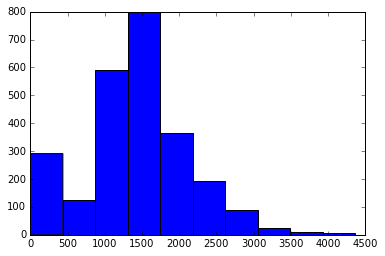

In [5]:
fig = plt.hist(dialog_len)
plt.show()

## Find major character

In [51]:
def collect_character_info(dialog):
    char_word_cnt = {}
    for char, line in dialog:
        cnt = char_word_cnt.get(char, 0)
        char_word_cnt[char] = cnt + len(line.split())
    temp = [(cnt, char) for char, cnt in char_word_cnt.iteritems()]
    return sorted(temp, reverse=True)

In [52]:
char_wcs = [collect_character_info(d) for d in api.dialogs.values()]

In [7]:
prot = api.get_protagonists()

In [8]:
f = open('major_char.json', 'wb')
import json
json.dump(prot, f)
f.close()

In [9]:
ratio = [float(major_cnt)/(major_cnt+bg_cnt) for (major_cnt, major), (bg_cnt, bg) in prot.values()]

(array([ 189.,  772.,  837.,  446.,  152.,   54.,    6.,    0.,    3.,   32.]),
 array([ 0.05915638,  0.15324074,  0.2473251 ,  0.34140947,  0.43549383,
         0.52957819,  0.62366255,  0.71774691,  0.81183128,  0.90591564,  1.        ]),
 <a list of 10 Patch objects>)

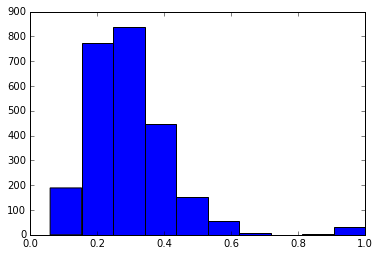

In [10]:
plt.hist(ratio)

In [11]:
np.mean(ratio)

0.29700727070591648